In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
# Dropping 'PassengerId', 'Name' and 'Cabin' columns.
train_df = train.drop(['PassengerId', 'Name', 'Cabin'], axis=1)

# Dropping 'nan' in 'HomePlanet' and 'Destination' as we can't impute that data.
train_df = train_df.dropna(subset=['HomePlanet', 'Destination'])

train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8314 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8314 non-null   object 
 1   CryoSleep     8103 non-null   object 
 2   Destination   8314 non-null   object 
 3   Age           8140 non-null   float64
 4   VIP           8117 non-null   object 
 5   RoomService   8142 non-null   float64
 6   FoodCourt     8139 non-null   float64
 7   ShoppingMall  8118 non-null   float64
 8   Spa           8137 non-null   float64
 9   VRDeck        8129 non-null   float64
 10  Transported   8314 non-null   bool   
dtypes: bool(1), float64(6), object(4)
memory usage: 722.6+ KB


<AxesSubplot:xlabel='Transported', ylabel='count'>

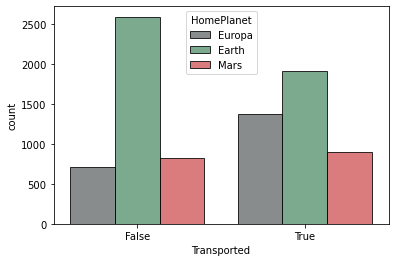

In [10]:
#sns.set_style('whitegrid')
sns.countplot(x='Transported', hue='HomePlanet', data=train_df,
              palette=['#6B7071', '#519F71', '#E5464B'], alpha=0.8, edgecolor="black")

In [11]:
# Encoding the string value columns: 'HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported'.
home = pd.get_dummies(train_df['HomePlanet'])
cryosleep = pd.get_dummies(train_df['CryoSleep'], prefix='Cryosleep', drop_first=True)
destination = pd.get_dummies(train_df['Destination'])#,drop_first=True)
vip = pd.get_dummies(train_df['VIP'], prefix='VIP', drop_first=True)
transported = pd.get_dummies(train_df['Transported'], prefix='Transported?', drop_first=True)

In [12]:
train_df = train_df.drop(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported'], axis=1)

train_df = pd.concat([train_df, home, cryosleep, destination, vip, transported], axis=1)

In [13]:
train_df

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,Europa,Mars,Cryosleep_True,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,VIP_True,Transported?_True
0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,0,0,1,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,0,0,1,1,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,0,0,1,0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,0,1,0,0,1,0,0,1,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,1,0,0,0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,1,0,0,0,0,0,1,0,1
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,0,1,0,0,1,0,0,0,0


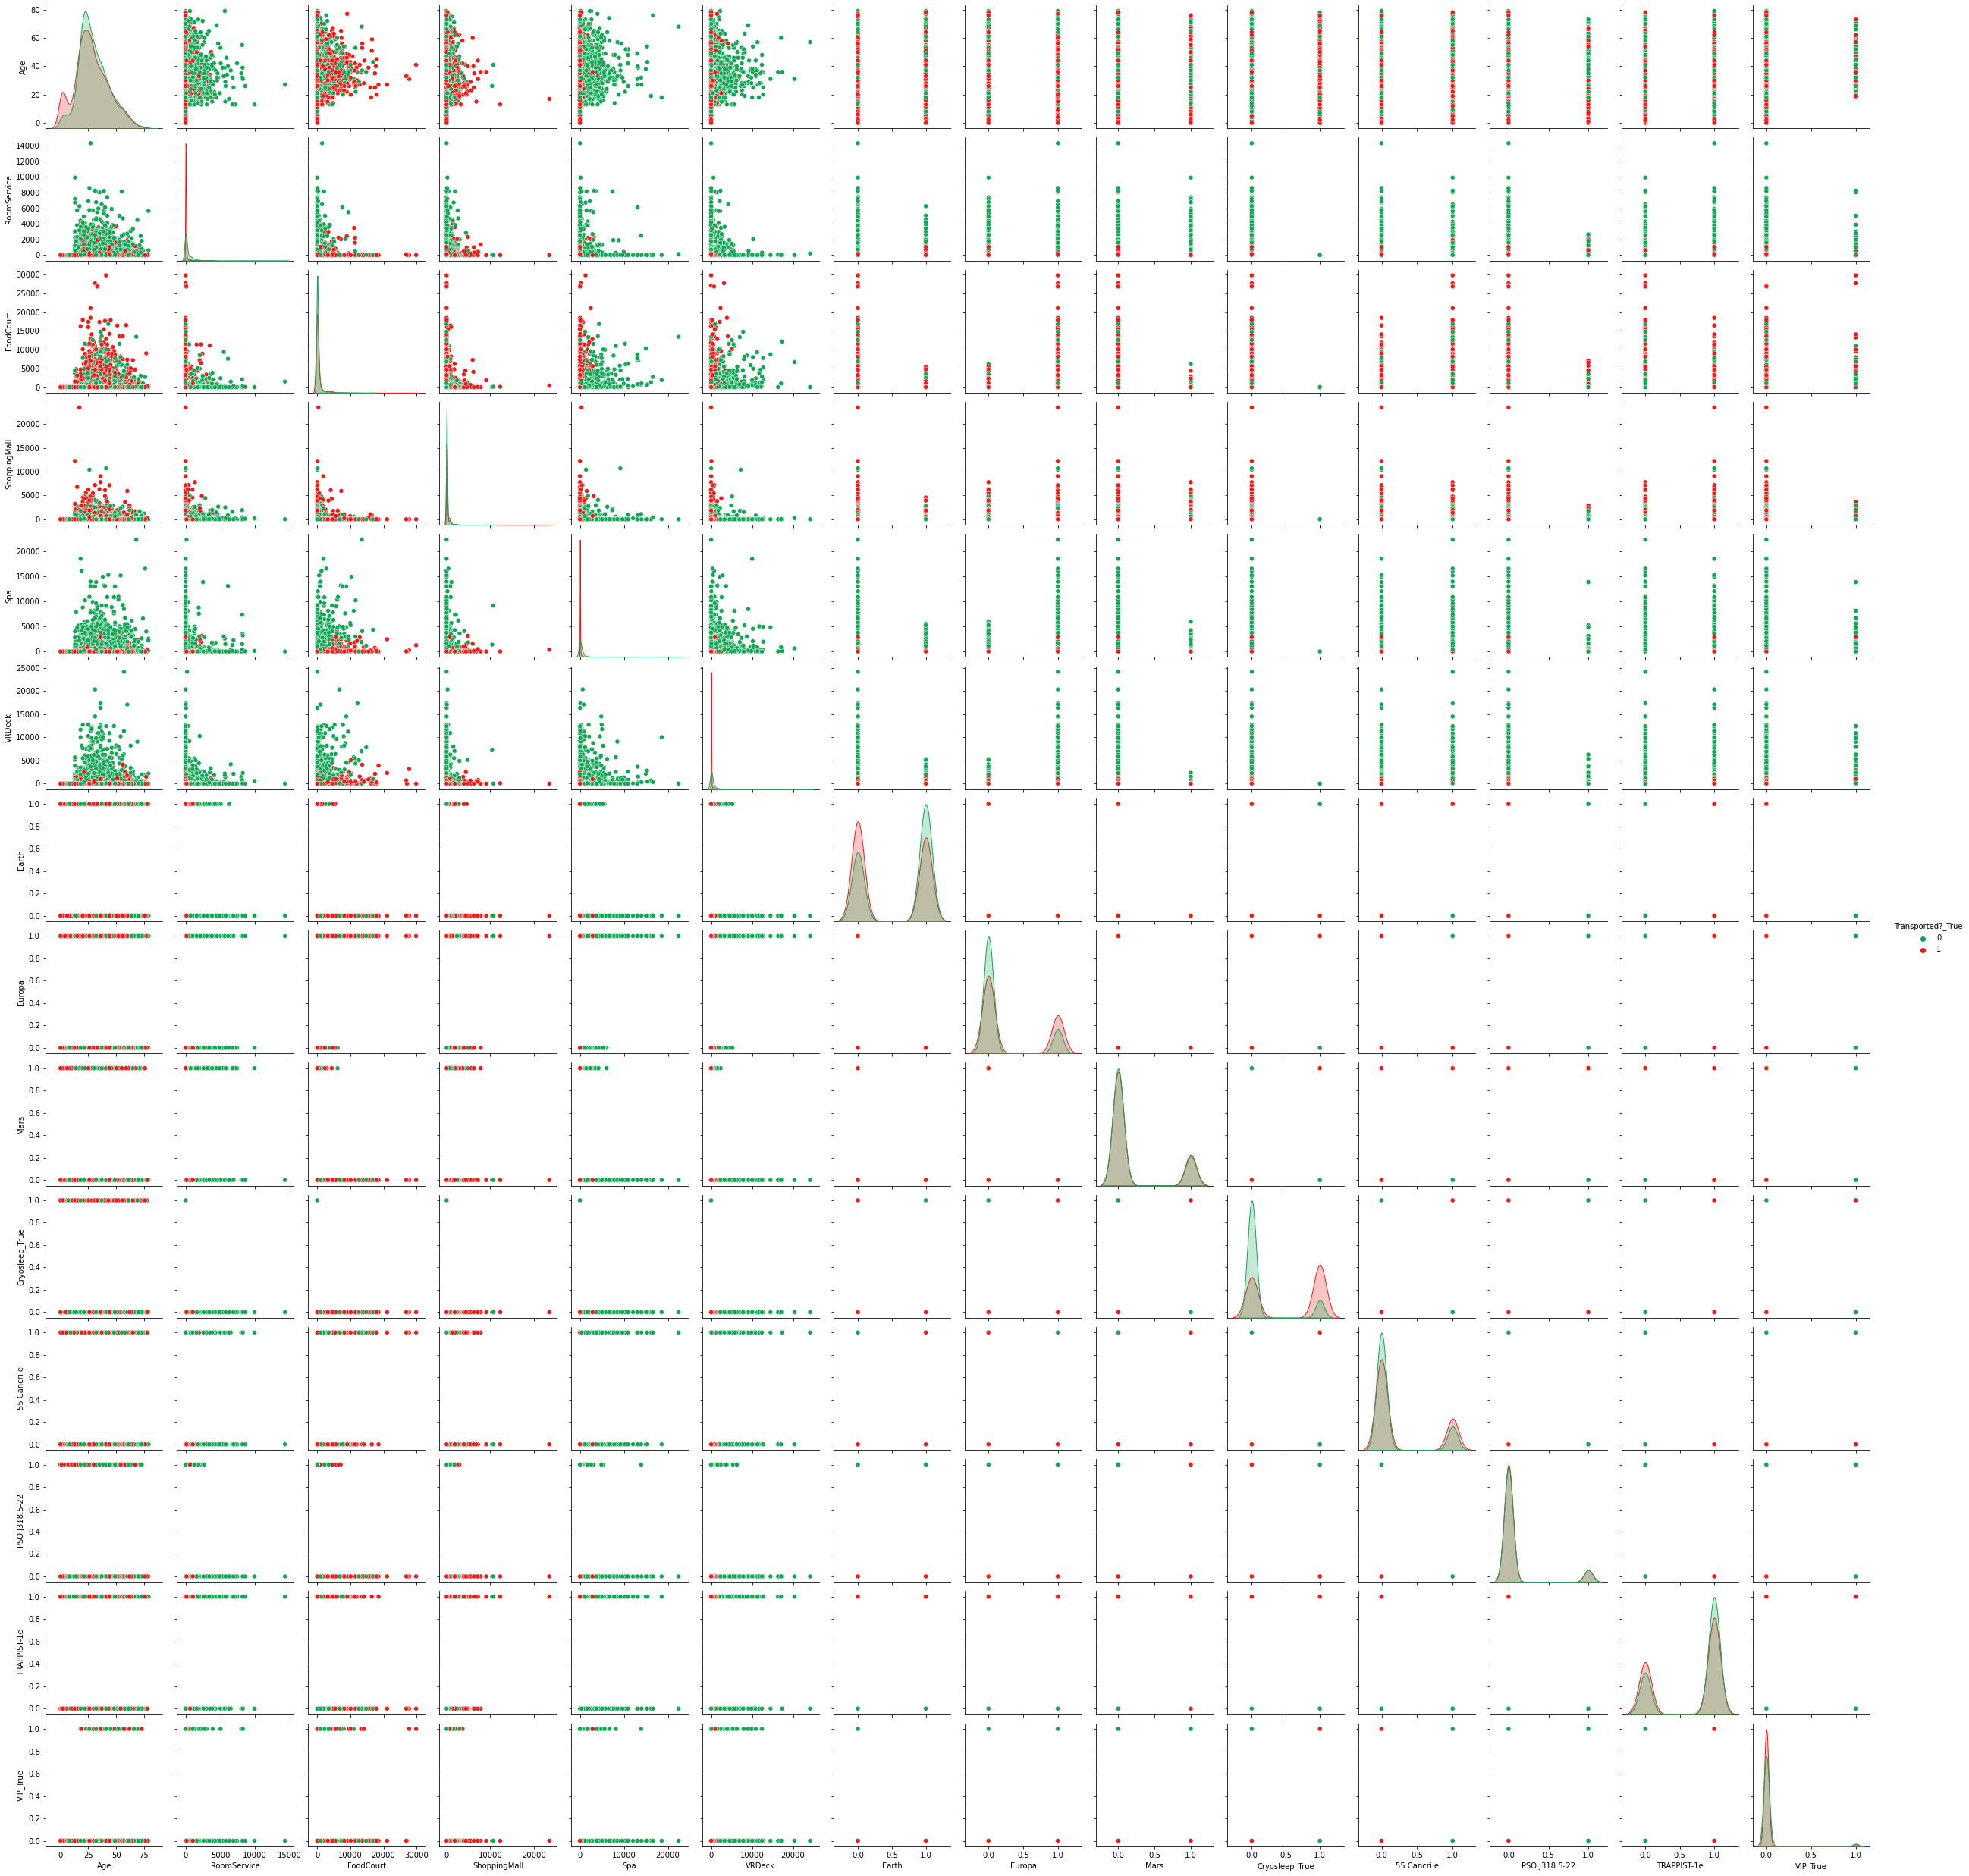

In [14]:
sns.pairplot(train_df, hue='Transported?_True', palette=['#11A554', '#EA1C18'])

# Red = Transported
# Green = Not Transported

<AxesSubplot:>

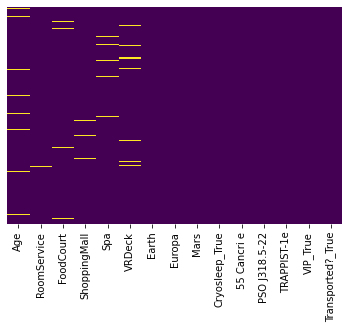

In [15]:
# Visualising missing data
sns.heatmap(train_df.isnull(), yticklabels=False,cbar=False, cmap='viridis')

In [16]:
train_df = train_df.dropna()